In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv('fifa_stats.csv')
df.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [3]:
df.isnull().sum()

Name                         0
Age                          0
Nationality                  0
Overall_rating               0
Potential                    0
Club                        19
Preferred Foot               0
International Reputation     0
Weak Foot                    0
Skill Moves                  0
Work Rate                    0
Position                     0
Jersey Number                0
Height                       0
Weight                       0
dtype: int64

In [10]:
df['Club'].isnull().sum()/len(df)*100

0.95

In [13]:
df.dropna(subset=['Club'],inplace=True)

In [14]:
df.isnull().sum().sum()

0

### a)	Assuming age as population, perform the central limit theorem with sample size of 200. Find the standard error and the mean of sampling distribution. Compare the results with population mean and standard deviation. Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size



In [23]:
n = 200
mu = df['Age'].mean()
print('Population mean',mu)
sd = df['Age'].std()
print('standard deviation',sd)
se = sd/np.sqrt(n)
print('standard error',se)
xbar = mu+1.96*(se)
print('sample mean',xbar)
print('Confidence interval for 95%')
print(stats.norm.interval(0.05,loc=mu,scale=se))

Population mean 27.215547703180214
standard deviation 3.8525185996930396
standard error 0.27241420264902505
sample mean 27.749479540372302
Confidence interval for 95%
(27.198465486266123, 27.232629920094304)


## b)	Is there any evidence that the players overall rating is greater than 80?

In [ ]:
Ho: The overall rating <= 80
H1: The overall rating > 80

In [5]:
r1 = df['Overall_rating']
n = len(df['Overall_rating'])
mu = 80
xbar = (df['Overall_rating']).mean()
print('Xbar',xbar)
sd = (df['Overall_rating']).std()
se = sd/np.sqrt(n)
print('Critical value')
print(stats.norm.isf(0.95,loc=xbar,scale=se))
print('P-value')
print(stats.norm.cdf(xbar,loc=mu,scale=se))
print('The critical value is in the critical region and the p-value is less than 5%,Hence Reject Null and conclude that the overall rating is greater than 80')

Xbar 78.197
Critical value
78.07614192540507
P-value
2.8718642827629733e-133
The critical value is in the critical region and the p-value is less than 5%,Hence Reject Null and conclude that the overall rating is greater than 80


In [6]:
len(df['Overall_rating'])

2000

In [45]:
stats.norm.cdf(xbar,loc=mu,scale=se)

0.0

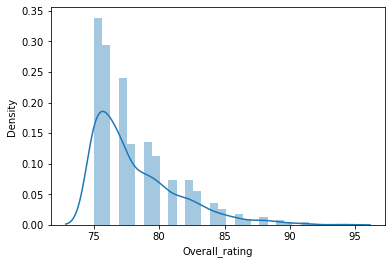

In [8]:
sns.distplot(df['Overall_rating'])
plt.show()

## c)	Perform the statistical test to identify whether preferred foot has any impact on potential. Also, perform the graphical analysis.

In [33]:
df['Preferred Foot'].value_counts()

Right    1519
Left      462
Name: Preferred Foot, dtype: int64

In [35]:
df['Potential'].unique()

array([94, 93, 92, 91, 90, 89, 95, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79,
       78, 77, 76, 75], dtype=int64)

ShapiroResult(statistic=0.9373535513877869, pvalue=8.425229710834448e-25)
ShapiroResult(statistic=0.9437844157218933, pvalue=3.187897645515192e-12)
LeveneResult(statistic=1.5665635192734586, pvalue=0.2108546965781491)
The P-value is less than 5% for shapiro test as we can conclude that the data is not normal
F_onewayResult(statistic=2.6621845772621833, pvalue=0.10291861885209323)
The p-value is more than 5%,Hence Failed to Reject Null and conclude that the preferred foot has impact on potential


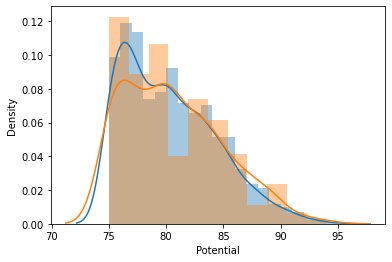

In [59]:
p1 = df[df['Preferred Foot'] == 'Right']['Potential']
p2 = df[df['Preferred Foot'] == 'Left']['Potential']
sns.distplot(p1)
sns.distplot(p2)
print(stats.shapiro(p1))
print(stats.shapiro(p2))
print(stats.levene(p1,p2))
print('The P-value is less than 5% for shapiro test as we can conclude that the data is not normal')
print(stats.f_oneway(p1,p2))
print('The p-value is more than 5%,Hence Failed to Reject Null and conclude that the preferred foot has impact on potential')

In [57]:
df['Potential'].value_counts().sum()

1981

## d)	Perform the statistical test to identify the relation between the overall rating and potential. [Assume both are continuous data points].

In [76]:
x1 = df['Overall_rating'].mean()
x2 = df['Potential'].mean()
s1 = df['Overall_rating'].std()
s2 = df['Potential'].std()
n1 = len(df['Overall_rating'])
n2 = len(df['Potential'])
zscore = (x1-x2)/np.sqrt((s1**2/n1)+(s2**2/n2))
print('Zscore',zscore)
print('Critical value')
print(stats.norm.isf(0.05))
print('P-value')
print(stats.norm.cdf(zscore))
print('The p-value is less than 5%,Hence Reject Null and conclude that there is relation between overall rating and potential')

Zscore -17.86119755089135
Critical value
1.6448536269514729
P-value
1.1825499530305208e-71
The p-value is less than 5%,Hence Reject Null and conclude that there is relation between overall rating and potential


### e)	Does skill move have any effect in overall rating? Perform the graphical analysis and the statistical analysis.

Zscore -976.4188932734295
Critical value
1.6448536269514729
P-value
0.0


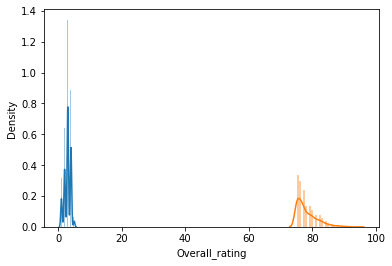

In [77]:
xbar = df['Skill Moves'].mean()
ybar = df['Overall_rating'].mean()
s1 = df['Skill Moves'].std()
s2 = df['Overall_rating'].std()
n1 = len(df['Skill Moves'])
n2 = len(df['Overall_rating'])
zscore = (xbar-ybar)/np.sqrt((s1**2/n1)+(s2**2/n2))
print('Zscore',zscore)
sns.distplot(df['Skill Moves'])
sns.distplot(df['Overall_rating'])
print('Critical value')
print(stats.norm.isf(0.05))
print('P-value')
print(stats.norm.cdf(zscore))

In [10]:
df1 = pd.read_csv('phone.csv')
df1.head()

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile


In [79]:
df1.shape

(820, 6)

In [81]:
df1.isnull().sum().sum()

0

In [82]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          820 non-null    object 
 1   duration      820 non-null    float64
 2   item          820 non-null    object 
 3   month         820 non-null    object 
 4   network       820 non-null    object 
 5   network_type  820 non-null    object 
dtypes: float64(1), object(5)
memory usage: 38.6+ KB


### a)With 95% & 99% Confidence Interval, find the range estimate of average duration calls made by the entire network. Which of the Intervals are wider? Interpret the results.

In [86]:
df1['duration'].nunique()

820

In [87]:
df1['network'].unique()

array(['data', 'Vodafone', 'Meteor', 'Tesco', 'Three', 'voicemail',
       'landline'], dtype=object)

In [90]:
n1 = df1[df1['network'] == 'data']['duration']
n2 = df1[df1['network'] == 'Vodafone']['duration']
n3 = df1[df1['network'] == 'Meteor']['duration']
n4 = df1[df1['network'] == 'Tesco']['duration']
n5 = df1[df1['network'] == 'Three']['duration']
n6 = df1[df1['network'] == 'voicemail']['duration']
n7 = df1[df1['network'] == 'landline']['duration']

In [93]:
print(stats.shapiro(df1['duration']))
print(stats.levene(n1,n2,n3,n4,n5,n6,n7))
print('The P-value is more than 5%,Hence the data is normal and the variances are equal according to shapiro and levenes')

ShapiroResult(statistic=0.9984679818153381, pvalue=0.701244592666626)
LeveneResult(statistic=1.529736398828682, pvalue=0.1653481809327658)
The P-value is more than 5%,Hence the data is normal and the variances are equal according to shapiro and levenes


<AxesSubplot:xlabel='duration', ylabel='Density'>

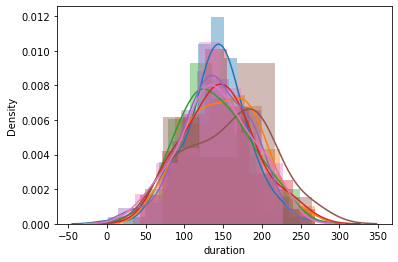

In [96]:
sns.distplot(n1)
sns.distplot(n2)
sns.distplot(n3)
sns.distplot(n4)
sns.distplot(n5)
sns.distplot(n6)
sns.distplot(n7)

In [97]:
stats.f_oneway(n1,n2,n3,n4,n5,n6,n7)

F_onewayResult(statistic=1.4036497792001215, pvalue=0.2102939953009413)

## The P-value is more than 5%,Hence Failed to Reject Null

<AxesSubplot:xlabel='network'>

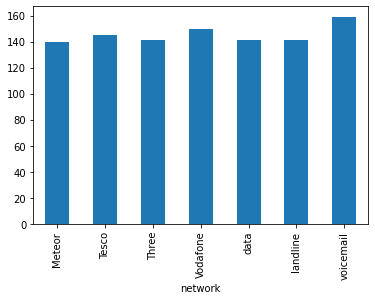

In [102]:
df1.groupby('network')['duration'].mean().plot(kind='bar')

### b)Perform statistical analysis to check whether the networks are equally distributed in the dataset

In [12]:
df1['network'].value_counts()

Three        215
Vodafone     215
data         150
Meteor        87
Tesco         84
landline      42
voicemail     27
Name: network, dtype: int64

### c) Plot the distribution of duration with respect to each network in the same graph and interpret the results from the graph

ShapiroResult(statistic=0.9984679818153381, pvalue=0.701244592666626)
LeveneResult(statistic=1.529736398828682, pvalue=0.1653481809327658)
The P-value is more than 5%,Hence the data is normal and the variances are equal according to shapiro and levenes


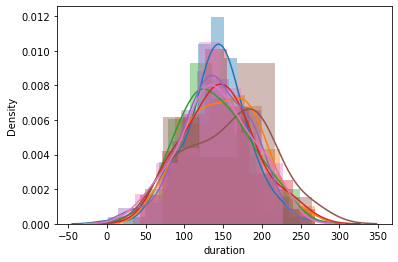

In [166]:
n1 = df1[df1['network'] == 'data']['duration']
n2 = df1[df1['network'] == 'Vodafone']['duration']
n3 = df1[df1['network'] == 'Meteor']['duration']
n4 = df1[df1['network'] == 'Tesco']['duration']
n5 = df1[df1['network'] == 'Three']['duration']
n6 = df1[df1['network'] == 'voicemail']['duration']
n7 = df1[df1['network'] == 'landline']['duration']
sns.distplot(n1)
sns.distplot(n2)
sns.distplot(n3)
sns.distplot(n4)
sns.distplot(n5)
sns.distplot(n6)
sns.distplot(n7)
print(stats.shapiro(df1['duration']))
print(stats.levene(n1,n2,n3,n4,n5,n6,n7))
print('The P-value is more than 5%,Hence the data is normal and the variances are equal according to shapiro and levenes')

In [111]:
N = df1['duration'].value_counts().sum()
t = df1['network'].nunique()
print(N,t)

820 7


In [114]:
print('Critical value')
print(stats.f.isf(0.05,dfn=6,dfd=813))

Critical value
2.1097142075162147


In [133]:
print(stats.f_oneway(n1,n2,n3,n4,n5,n6,n7))
print('p-value is greater than 5%,Hence Failed to Reject Null and conclude that all the networks are having same duration')

F_onewayResult(statistic=1.4036497792001215, pvalue=0.2102939953009413)
p-value is greater than 5%,Hence Failed to Reject Null and conclude that all the networks are having same duration


### d)	Perform statistical tests to identify the relation between item and duration. Detailed explanation of relation between the classes is required.

In [127]:
df1['item'].unique()

array(['data', 'call', 'sms'], dtype=object)

In [128]:
df1['duration'].nunique()

820

ShapiroResult(statistic=0.9912639856338501, pvalue=0.48521795868873596)
ShapiroResult(statistic=0.9973042011260986, pvalue=0.7803382277488708)
ShapiroResult(statistic=0.9943404197692871, pvalue=0.37839275598526)
LeveneResult(statistic=3.4300976447008478, pvalue=0.03285087780533987)


<AxesSubplot:xlabel='duration', ylabel='Density'>

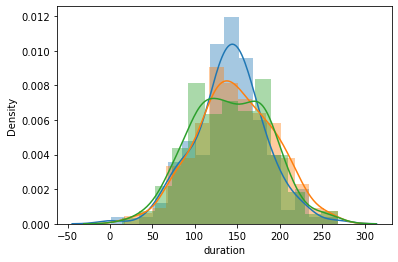

In [129]:
i1 = df1[df1['item'] == 'data']['duration']
i2 = df1[df1['item'] == 'call']['duration']
i3 = df1[df1['item'] == 'sms']['duration']
print(stats.shapiro(i1))
print(stats.shapiro(i2))
print(stats.shapiro(i3))
print(stats.levene(i1,i2,i3))
sns.distplot(i1)
sns.distplot(i2)
sns.distplot(i3)

In [131]:
print('Critical value')
print(stats.f.isf(0.05,dfn=2,dfd=817))

Critical value
3.0067437669029107


In [134]:
print(stats.f_oneway(i1,i2,i3))
print('P-value is more than 5%,Hence Faied to Reject Null and conclude that they both have good relation')

F_onewayResult(statistic=1.9313964906864995, pvalue=0.1456068656611744)
P-value is more than 5%,Hence Faied to Reject Null and conclude that they both have good relation


### e)	Perform statistical tests to identify the relation between network and network_type.

In [136]:
l1 = pd.crosstab(df1['network'],df1['network_type'])

In [141]:
observed_value = l1.values
observed_value

array([[  0,   0,  87,   0],
       [  0,   0,  84,   0],
       [  0,   0, 215,   0],
       [  0,   0, 215,   0],
       [150,   0,   0,   0],
       [  0,  42,   0,   0],
       [  0,   0,   0,  27]], dtype=int64)

In [143]:
print('Critical value')
stats.chi2.isf(0.05,df=18)      #df = (row-1)*(column-1)

Critical value


28.869299430392637

In [151]:
stats.chisquare(observed_value)

Power_divergenceResult(statistic=array([900.        , 252.        , 646.12978369, 162.        ]), pvalue=array([3.75671602e-191, 1.53284998e-051, 2.59979007e-136, 2.23259146e-032]))

In [157]:
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 2460.0
p-value: 0.0
Degrees of freedom: 18
Expected values: [[ 15.91463415   4.45609756  63.76463415   2.86463415]
 [ 15.36585366   4.30243902  61.56585366   2.76585366]
 [ 39.32926829  11.01219512 157.57926829   7.07926829]
 [ 39.32926829  11.01219512 157.57926829   7.07926829]
 [ 27.43902439   7.68292683 109.93902439   4.93902439]
 [  7.68292683   2.15121951  30.78292683   1.38292683]
 [  4.93902439   1.38292683  19.78902439   0.88902439]]
